## Medical Cost dataset


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the charges is affected by other variables such as Sex, Children, Smoker, Region and BMI.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/mirichoi0218/insurance
- The data consists of 7 column and 1338 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/insurance.csv')

#### Show Top 5 Records

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Shape of the dataset

In [4]:
df.shape

(1338, 7)

### 2.2 Dataset information

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

1

In [7]:
#Drop duplicates
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Insight
- The age range goes from 18 to 64 years.
- The average spending on insurance is $13,279.

### 3.7 Exploring Data

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:  ",end=" ")
print(df['smoker'].unique())

print("Categories in 'region' variable:",end=" " )
print(df['region'].unique())

print("Categories in 'children' variable:",end=" " )
print(df['children'].unique())

Categories in 'sex' variable:      ['female' 'male']
Categories in 'smoker' variable:   ['yes' 'no']
Categories in 'region' variable: ['southwest' 'southeast' 'northwest' 'northeast']
Categories in 'children' variable: [0 1 3 2 5 4]


In [14]:
# define numerical & categorical columns
numeric_features =[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']

We have 3 categorical features : ['sex', 'smoker', 'region']


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


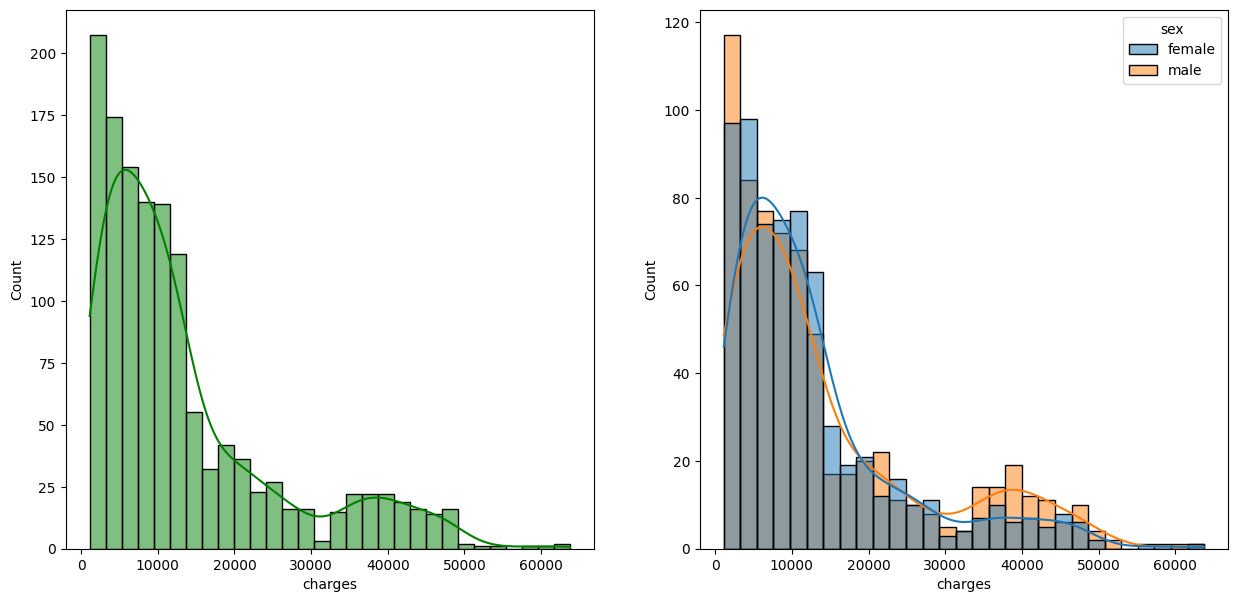

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='charges',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='charges',kde=True,hue='sex')
plt.show()

## Insights
Between payments of $30,000 to $50,000, there seems to be a difference, with men paying more.

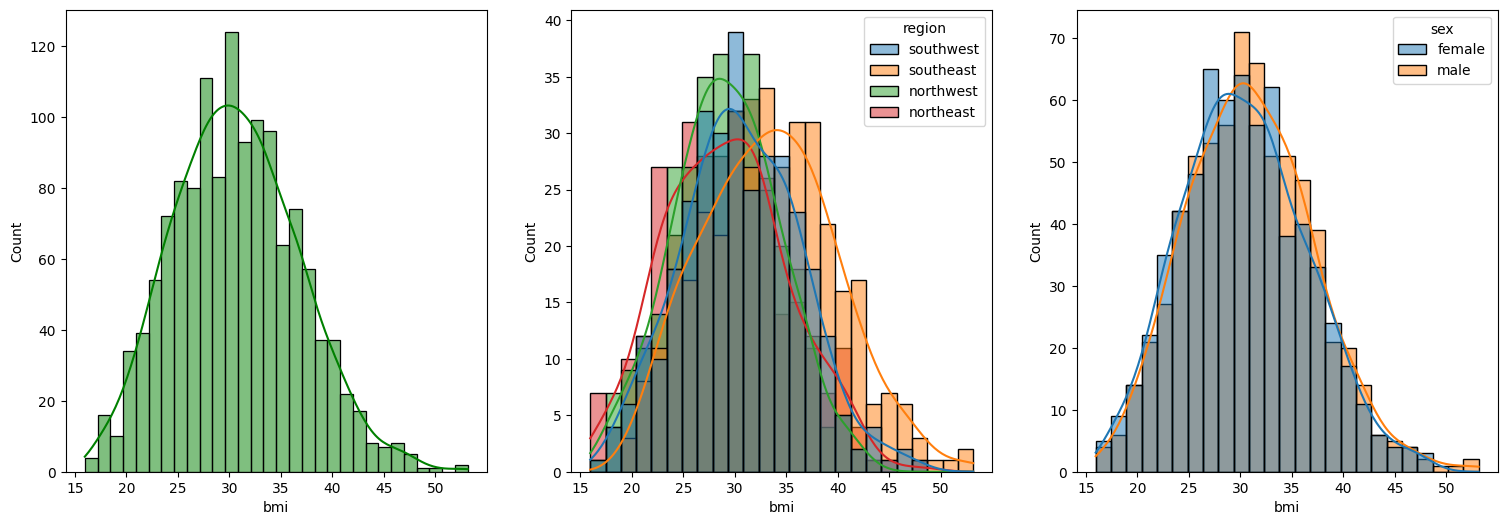

In [17]:
fig, axs = plt.subplots(1,3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df,x='bmi',bins=30,kde=True,color='g')
plt.subplot(142)
sns.histplot(data=df,x='bmi',kde=True,hue='region')
plt.subplot(143)
sns.histplot(data=df,x='bmi',kde=True,hue='sex')
plt.show()


- Most of people are around 25 and 35 BMI
- Southeast people tend to have more BMI
- Males seems to have more BMI

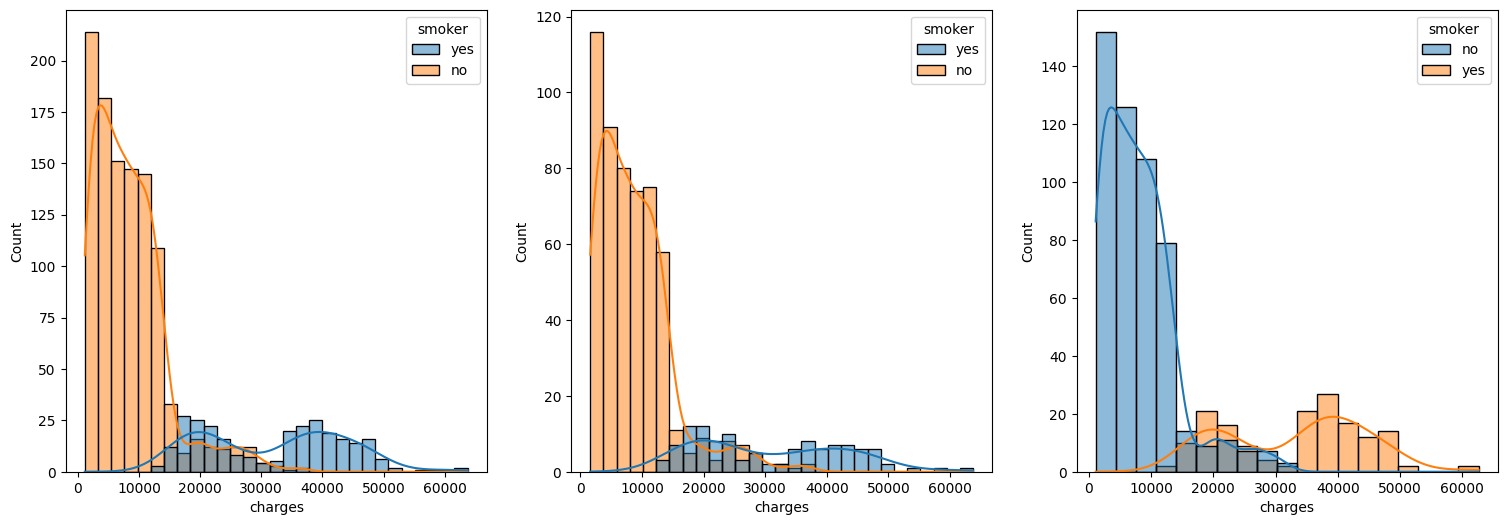

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='charges',kde=True,hue='smoker')
plt.subplot(142)
sns.histplot(data=df[df.sex=='female'],x='charges',kde=True,hue='smoker')
plt.subplot(143)
sns.histplot(data=df[df.sex=='male'],x='charges',kde=True,hue='smoker')
plt.show()

#####  Insights
- Obviously non smoker people have less charges than smokers
- There's almost no difference between smokers in terms of sex

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


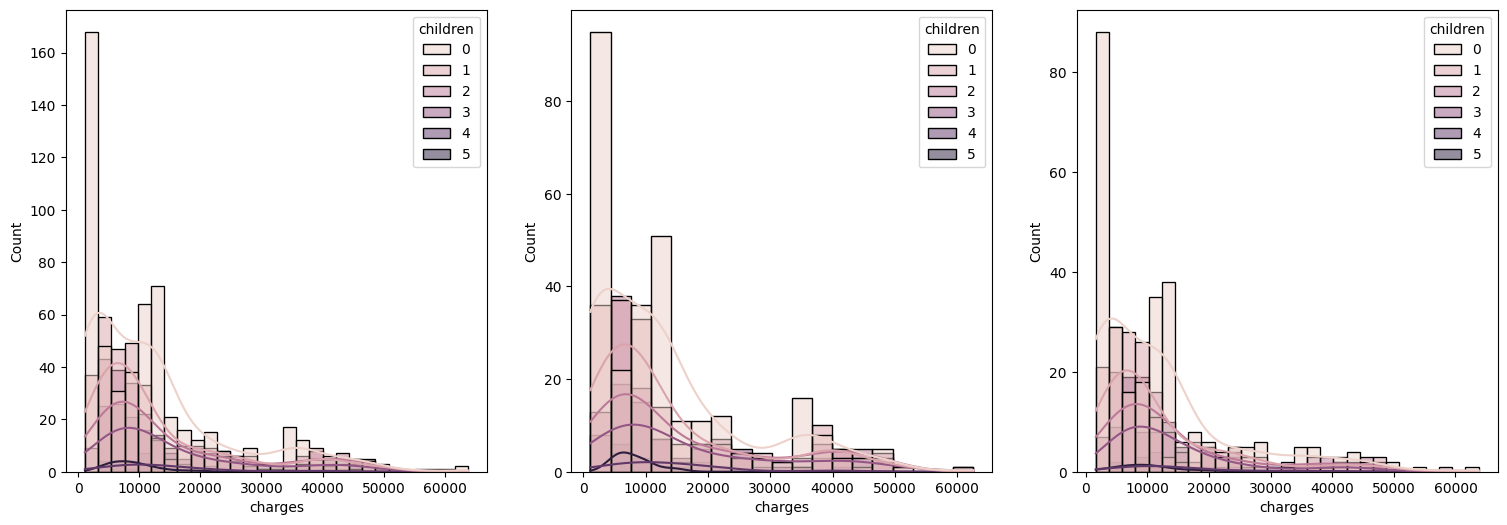

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='charges',kde=True,hue='children')
plt.subplot(142)
ax =sns.histplot(data=df[df.sex=='male'],x='charges',kde=True,hue='children')
plt.subplot(143)
ax =sns.histplot(data=df[df.sex=='female'],x='charges',kde=True,hue='children')
plt.show()

#####  Insights
- Men with children have higher charges between $30,000 and $50,000 than women.

#### 4.3 Multivariate analysis using pieplot

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

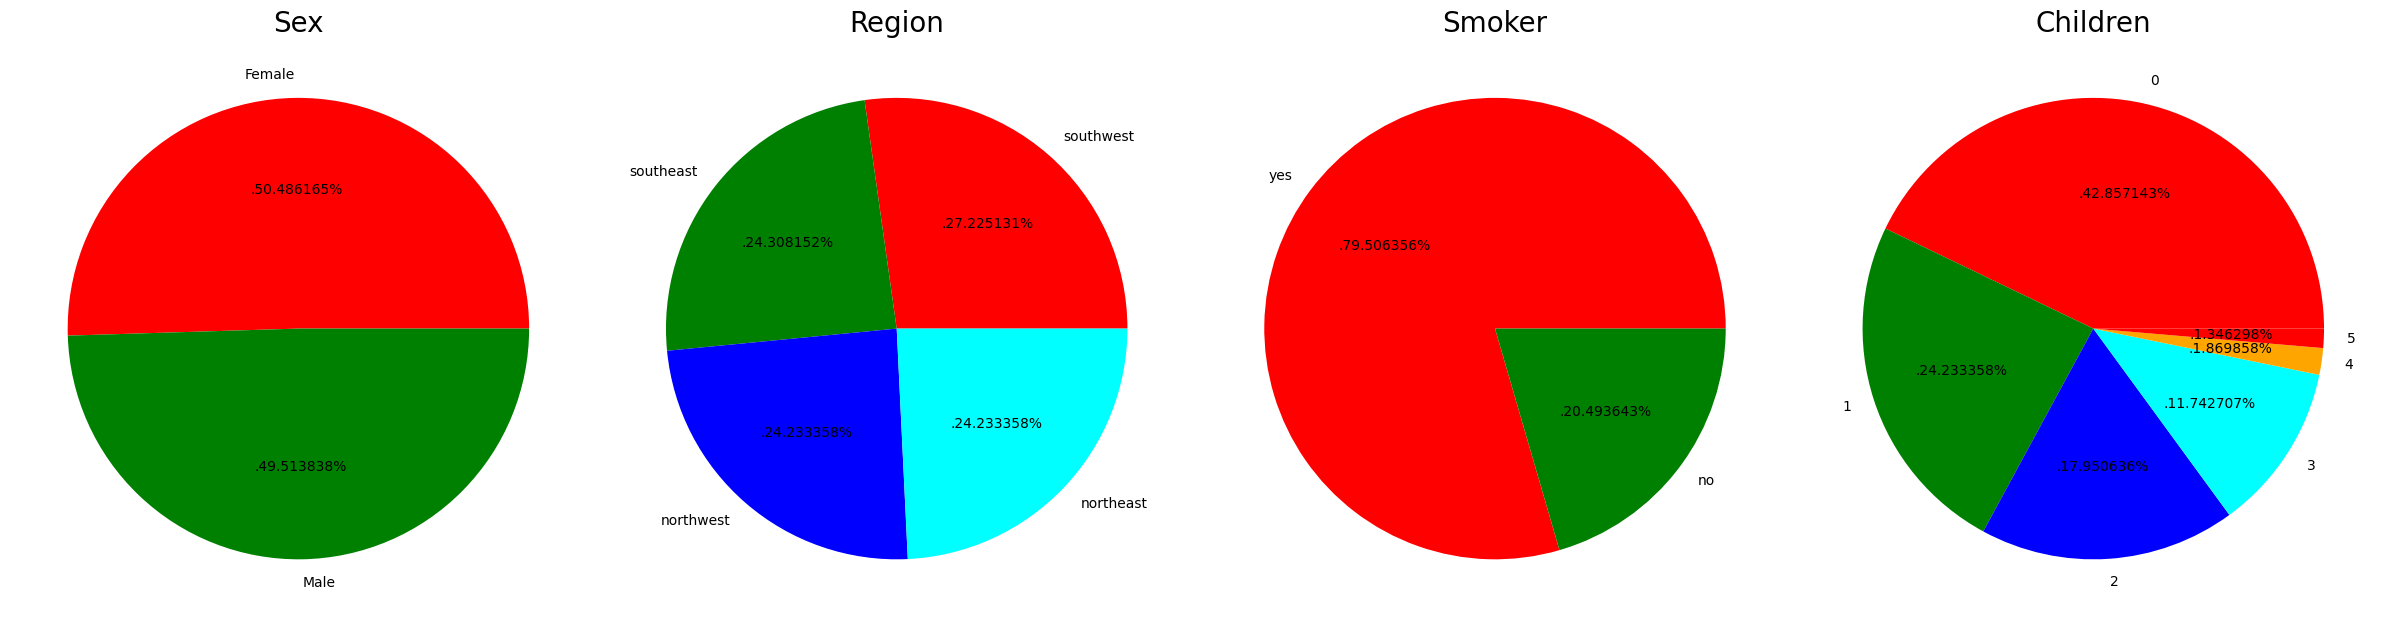

In [30]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['sex'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Sex', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['region'].value_counts()
labels = 'southwest', 'southeast','northwest','northeast'
color = ['red', 'green', 'blue', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Region', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['smoker'].value_counts()
labels = 'yes', 'no'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Smoker', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['children'].value_counts()
labels = '0', '1', '2', '3', '4', '5'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Children', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female is almost equal
- Number of Region are almost equal
- There are almost 80% of people who smoke